### 아래는 한 회사의 고객 리스트이다. 이 데이터를 활용하여 아래의 문제들에 대한 답을 찾는 Python 스크립트를 작성하라.
#### sales는 각 고객별 총판매금액이며 freq는 구매횟수이다.

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cust = pd.DataFrame({'age':np.arange(30,51), 'sales':np.repeat([60,60,80],7)})
freq = np.repeat([3,7,4,2,1,1,2],3)

#### # 문제1: 고객의 수를 계산하라.

In [147]:
print("고객의 수:", len(cust), "명")

고객의 수: 21 명


#### # 문제2: 고객의 나이를 큰 값에서 작은 값의 순서로 정렬하라.

In [148]:
cust_age_desc = cust.sort_values(by=['age'], axis=0, ascending=False)
print("<고객 나이 내림차순>\n", cust_age_desc)

<고객 나이 내림차순>
     age  sales
20   50     80
19   49     80
18   48     80
17   47     80
16   46     80
15   45     80
14   44     80
13   43     60
12   42     60
11   41     60
10   40     60
9    39     60
8    38     60
7    37     60
6    36     60
5    35     60
4    34     60
3    33     60
2    32     60
1    31     60
0    30     60


#### # 문제3: 고객의 나이 중 두 번째로 큰 값은 얼마인가?

In [149]:
print("두 번째로 나이가 많은 고객의 나이:", cust_age_desc['age'][19], "세")

두 번째로 나이가 많은 고객의 나이: 49 세


#### # 문제4: sales의 평균값은 얼마인가?

In [150]:
mean_sales = round(cust['sales'].mean(),2)
print("sales의 평균값:", mean_sales)

sales의 평균값: 66.67


#### # 문제5: 각 고객별로 sales와 전체고객의 sales 평균간의 차이는 얼마인가?

In [151]:
print("<각 고객별 평균값 차이>\n", mean_sales - cust['sales'])

<각 고객별 평균값 차이>
 0      6.67
1      6.67
2      6.67
3      6.67
4      6.67
5      6.67
6      6.67
7      6.67
8      6.67
9      6.67
10     6.67
11     6.67
12     6.67
13     6.67
14   -13.33
15   -13.33
16   -13.33
17   -13.33
18   -13.33
19   -13.33
20   -13.33
Name: sales, dtype: float64


#### # 문제6: cust dataframe에 freq를 컬럼으로 추가한 후 처음부터 3명의 고객을 출력하라.

In [152]:
cust['freq'] = freq.tolist()
print("<freq를 추가한 첫 세 명>\n", cust[:3])

<freq를 추가한 첫 세 명>
    age  sales  freq
0   30     60     3
1   31     60     3
2   32     60     3


#### # 문제7: 고객별 구매 1건당 평균 sales 금액을 구하여 avgsales라는 이름의 컬럼으로 cust dataframe에 추가한 후 마지막 두 명의 고객을 출력하라.

In [153]:
cust['avgsales'] = cust['sales'] / cust['freq']
print("<avgsales를 추가한 마지막 두 명>\n", cust[-2:])

<avgsales를 추가한 마지막 두 명>
     age  sales  freq  avgsales
19   49     80     2      40.0
20   50     80     2      40.0


#### # 문제8: cust dataframe을 avgsales 순서로 정렬하고, avgsales가 가장 큰 세 명의 고객을 출력하라.

In [154]:
cust.sort_values(by=['avgsales'], axis=0)
print("<avgsales가 큰 세 명>\n", cust[-3:])

<avgsales가 큰 세 명>
     age  sales  freq  avgsales
18   48     80     2      40.0
19   49     80     2      40.0
20   50     80     2      40.0


#### # 문제9: 고객의 freq와 sales간의 분포를 scatter plot으로 작성하라.

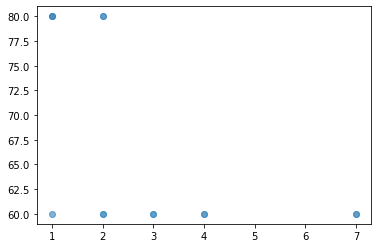

<Figure size 432x288 with 0 Axes>

In [155]:
plt.scatter(cust['freq'], cust['sales'], alpha=1/3)
plt.show()
plt.clf()

#### # 문제10 : freq와 평균sales간의 관계를 scatterplot을 이용하여 시각화하고 점들간의 분포를 보여주는 폴리노미얼 추세선을 추가하라. 동일 좌표에 복수의 점이 존재할 수 있으므로 jitter 함수를 이용하여 복수의 점이 존재하는지를 scatterplot에 반영하라.

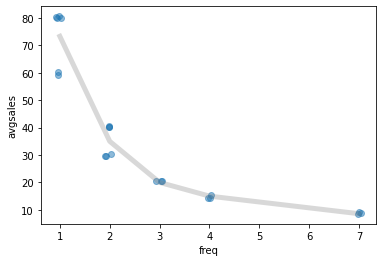

<Figure size 432x288 with 0 Axes>

In [156]:
sns.regplot(data=cust, x='freq', y='avgsales', fit_reg=False, x_jitter=0.1, y_jitter=1, scatter_kws={'alpha':0.5})

def poly_line(arr) :
    plot_df = pd.DataFrame(columns=['sumsales', 'cnt'])

    x_value = []
    for v in arr['freq'] :
        if v not in x_value:
            x_value.append(v)

    plot_df['freq'] = x_value
    plot_df = plot_df.fillna(0)

    for index, row in arr.iterrows() :
        for v in x_value :
            if row['freq'] == v :
                plot_df.loc[plot_df['freq'] == v, 'cnt'] = plot_df.loc[plot_df['freq'] == v, 'cnt'] + row['freq']
                plot_df.loc[plot_df['freq'] == v, 'sumsales'] = plot_df.loc[plot_df['freq'] == v, 'sumsales'] + row['sales']

    plot_df['avgsales'] = plot_df['sumsales'] / plot_df['cnt']
    plot_df = plot_df.sort_values(by=['freq'], axis=0, ascending=False)

    plt.plot(plot_df['freq'], plot_df['avgsales'], color="grey", alpha=0.3, linewidth=5)

poly_line(cust)
plt.show()
plt.clf()

#### # 문제11: 문제 10의 결과에서 40대인 고객들만 red color로 점을 표시하라.

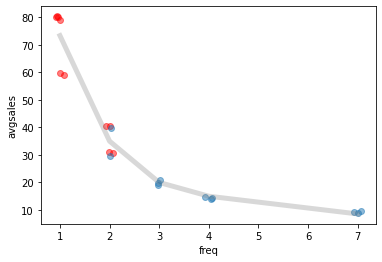

<Figure size 432x288 with 0 Axes>

In [157]:
cust_age_40     = cust[ (cust['age'] >= 40) & (cust['age'] < 50) ]
cust_age_not_40 = cust[ (cust['age'] < 40) | (cust['age'] >= 50) ]
sns.regplot(data=cust_age_40, x='freq', y='avgsales', fit_reg=False, x_jitter=0.1, y_jitter=1, scatter_kws={'alpha':0.5}, color="red")
sns.regplot(data=cust_age_not_40, x='freq', y='avgsales', fit_reg=False, x_jitter=0.1, y_jitter=1, scatter_kws={'alpha':0.5})
poly_line(cust)
plt.show()
plt.clf()

#### # 문제12: 고객리스트에 동일하게 36세이며 두 번에 걸쳐 총 55를 구매한 고객을 세 명 추가한 후 문제 11과 같은 형식의 scatter plot을 작성하라

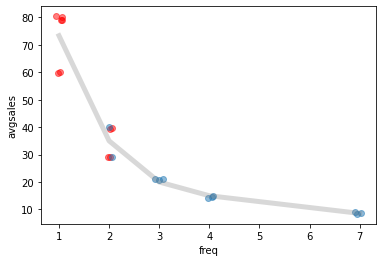

<Figure size 432x288 with 0 Axes>

In [160]:
cust_add = cust

for i in range(3) :
    cust_add.append({'age':36, 'sales':55, 'freq':2, 'avgsales':55/2}, ignore_index=True)

cust_age_40     = cust[ (cust['age'] >= 40) & (cust['age'] < 50) ]
cust_age_not_40 = cust[ (cust['age'] < 40) | (cust['age'] >= 50) ]
sns.regplot(data=cust_age_40, x='freq', y='avgsales', fit_reg=False, x_jitter=0.1, y_jitter=1, scatter_kws={'alpha':0.5}, color="red")
sns.regplot(data=cust_age_not_40, x='freq', y='avgsales', fit_reg=False, x_jitter=0.1, y_jitter=1, scatter_kws={'alpha':0.5})
poly_line(cust)
plt.show()
plt.clf()
